### IMPORTING THE LIBRARIES AND THE DATASETS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

IMPORT THE TRAIN DATA

In [2]:
train_df=pd.read_excel(r"C:\Users\HP\Desktop\PYTHON\flight ticket price\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
train_df=pd.DataFrame(data=train_df)
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_df.shape

(10683, 11)

IMPORT THE TEST DATA

In [4]:
test_df=pd.read_excel(r"C:\Users\HP\Desktop\PYTHON\flight ticket price\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
test_df=pd.DataFrame(data=test_df)
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
test_df.shape

(2671, 10)

APPEND THE TRAIN AND TEST DATA 

In [6]:
final_df=train_df.append(test_df)
final_df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


In [7]:
final_df.shape

(13354, 11)

In [8]:
final_df.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops'],
      dtype='object')

WE APPENDED THE TRAIN AND TEST DATA TOGETHER SO THAT WE CAN WORK ON THEM TOGETHER AND WE WILL NOT HAVE TO MAKE THE CHANGES SEPERATELY !

### DATA CLEANSING AND WRANGLING

In the column ‘Date_of_Journey’, we can see the date format is given as dd/mm/yyyy and as you can see the datatype is given as object So there is two ways to tackle this column, either convert the column into Timestamp or divide the column into date,Month ,Year. Here , i am splitting the columns

In [9]:
final_df["Date"]=final_df["Date_of_Journey"].str.split('/').str[0]
final_df["Month"]=final_df["Date_of_Journey"].str.split('/').str[1]
final_df["Year"]=final_df["Date_of_Journey"].str.split('/').str[2]

In the column ‘Arrival_Time’,if we see we have combination of both time and month but we need only the time details out of it so we split the time into ‘Hours’ and ‘Minute’.

In [10]:
final_df["Arrival_Time"]=final_df["Arrival_Time"].str.split(' ').str[0]

final_df["Arrival_Hour"]=final_df["Arrival_Time"].str.split(':').str[0]
final_df["Arrival_Minute"]=final_df["Arrival_Time"].str.split(':').str[1]

In [11]:
final_df["Arrival_Hour"]=final_df["Arrival_Hour"].astype(int)
final_df["Arrival_Minute"]=final_df["Arrival_Minute"].astype(int)

In [12]:
final_df.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute'],
      dtype='object')

As same as ‘Arrival_time’ .we split this column also in hour and minute and convert it into integer

In [13]:
final_df["Dep_Hour"]=final_df["Dep_Time"].str.split(':').str[0]
final_df["Dep_Minute"]=final_df["Dep_Time"].str.split(':').str[1]

final_df["Dep_Hour"]=final_df["Dep_Hour"].astype(int)
final_df["Dep_Minute"]=final_df["Dep_Minute"].astype(int)

In [14]:
final_df.columns

Index(['Additional_Info', 'Airline', 'Arrival_Time', 'Date_of_Journey',
       'Dep_Time', 'Destination', 'Duration', 'Price', 'Route', 'Source',
       'Total_Stops', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute'],
      dtype='object')

This column is combination of number and a categorical variable like ‘1 stop’ . So we need only the number details from this column so we split that and take the number details only also we change the ‘non stop’ into ‘0 stop’ and convert the column into integer type

In [15]:
final_df["Total_Stops"].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [16]:
final_df["Total_Stops"]=final_df["Total_Stops"].replace(to_replace="non-stop",value="0 stop")
final_df["Total_Stops"]=final_df["Total_Stops"].replace(to_replace=np.nan,value="0 stop")

In [17]:
final_df["Stop"]=final_df["Total_Stops"].str.split(' ').str[0]

In [18]:
final_df["Stop"]=final_df["Stop"].astype(int)

In [19]:
final_df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop
0,No info,IndiGo,01:10,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,0 stop,24,03,2019,1,10,22,20,0
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,05,2019,13,15,5,50,2
2,No info,Jet Airways,04:25,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,06,2019,4,25,9,25,2
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,05,2019,23,30,18,5,1
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,01,03,2019,21,35,16,50,1


In [23]:
final_df["Route1"]=final_df["Route"].str.split("→ ").str[0]
final_df["Route2"]=final_df["Route"].str.split("→ ").str[1]
final_df["Route3"]=final_df["Route"].str.split("→ ").str[2]
final_df["Route4"]=final_df["Route"].str.split("→ ").str[3]
final_df["Route5"]=final_df["Route"].str.split("→ ").str[4]

final_df["Route1"].fillna("None",inplace=True)
final_df["Route2"].fillna("None",inplace=True)
final_df["Route3"].fillna("None",inplace=True)
final_df["Route4"].fillna("None",inplace=True)
final_df["Route5"].fillna("None",inplace=True)

In [24]:
final_df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           0
Date                  0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
Stop                  0
Route1                0
Route2                0
Route3                0
Route4                0
Route5                0
dtype: int64

NOW LETS DROP THE COLUMNS FOR WHICH WE HAVE DUMMY COLUMNS

In [25]:
final_df=final_df.drop("Date_of_Journey",axis=1)
final_df=final_df.drop("Dep_Time",axis=1)
final_df=final_df.drop("Arrival_Time",axis=1)
final_df=final_df.drop("Route",axis=1)

In [26]:
final_df=final_df.drop("Duration",axis=1)

In [28]:
final_df.columns

Index(['Additional_Info', 'Airline', 'Destination', 'Price', 'Source',
       'Total_Stops', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Minute', 'Dep_Hour', 'Dep_Minute', 'Stop', 'Route1', 'Route2',
       'Route3', 'Route4', 'Route5'],
      dtype='object')

In [29]:
final_df.shape

(13354, 19)

In [30]:
final_df.isnull().sum()

Additional_Info       0
Airline               0
Destination           0
Price              2671
Source                0
Total_Stops           0
Date                  0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
Stop                  0
Route1                0
Route2                0
Route3                0
Route4                0
Route5                0
dtype: int64

### Treating the null values

In [32]:
final_df["Price"].fillna(final_df["Price"].median(),inplace=True)

In [33]:
final_df.isnull().sum()

Additional_Info    0
Airline            0
Destination        0
Price              0
Source             0
Total_Stops        0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Stop               0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

### Handling and removing outliers using log

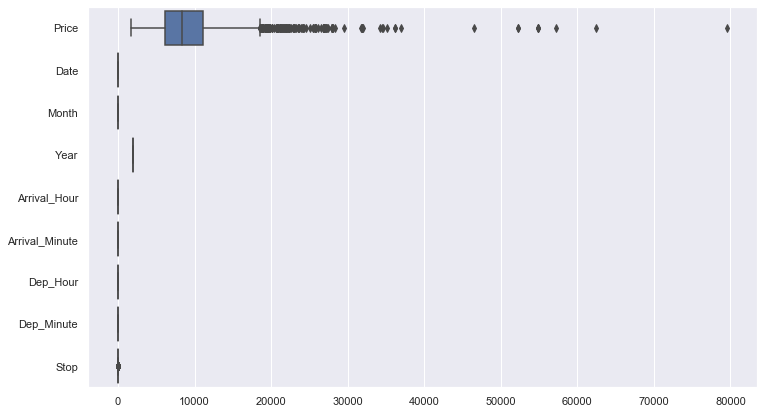

In [36]:
#check for the outliers
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
sns.boxplot(data=final_df,orient="h")

In [37]:
final_df.shape

(13354, 19)

In [38]:
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,IndiGo,New Delhi,3897.0,Banglore,0 stop,24,03,2019,1,10,22,20,0,BLR,DEL,None,None,None
1,No info,Air India,Banglore,7662.0,Kolkata,2 stops,1,05,2019,13,15,5,50,2,CCU,IXR,BBI,BLR,None
2,No info,Jet Airways,Cochin,13882.0,Delhi,2 stops,9,06,2019,4,25,9,25,2,DEL,LKO,BOM,COK,None
3,No info,IndiGo,Banglore,6218.0,Kolkata,1 stop,12,05,2019,23,30,18,5,1,CCU,NAG,BLR,None,None
4,No info,IndiGo,New Delhi,13302.0,Banglore,1 stop,01,03,2019,21,35,16,50,1,BLR,NAG,DEL,None,None


### One hot Encoding

In [39]:
final_df["Airline"].value_counts().to_dict()

{'Jet Airways': 4746,
 'IndiGo': 2564,
 'Air India': 2192,
 'Multiple carriers': 1543,
 'SpiceJet': 1026,
 'Vistara': 608,
 'Air Asia': 405,
 'GoAir': 240,
 'Multiple carriers Premium economy': 16,
 'Jet Airways Business': 8,
 'Vistara Premium economy': 5,
 'Trujet': 1}

In [40]:
#now lets assign arilines to a variable
airline_map = final_df["Airline"].value_counts().to_dict()

In [41]:
#now we replace Airline lables in the dataset x
final_df["Airline"]=final_df["Airline"].map(airline_map)

final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,2564,New Delhi,3897.0,Banglore,0 stop,24,03,2019,1,10,22,20,0,BLR,DEL,None,None,None
1,No info,2192,Banglore,7662.0,Kolkata,2 stops,1,05,2019,13,15,5,50,2,CCU,IXR,BBI,BLR,None
2,No info,4746,Cochin,13882.0,Delhi,2 stops,9,06,2019,4,25,9,25,2,DEL,LKO,BOM,COK,None
3,No info,2564,Banglore,6218.0,Kolkata,1 stop,12,05,2019,23,30,18,5,1,CCU,NAG,BLR,None,None
4,No info,2564,New Delhi,13302.0,Banglore,1 stop,01,03,2019,21,35,16,50,1,BLR,NAG,DEL,None,None


In [42]:
final_df["Source"].value_counts().to_dict()

{'Delhi': 5682,
 'Kolkata': 3581,
 'Banglore': 2752,
 'Mumbai': 883,
 'Chennai': 456}

In [43]:
#the same process we will apply to source and destination
#assign source to a variable

source_map=final_df["Source"].value_counts().to_dict()
#now we replace Source lables in the dataset x
final_df["Source"]=final_df["Source"].map(source_map)
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,2564,New Delhi,3897.0,2752,0 stop,24,03,2019,1,10,22,20,0,BLR,DEL,None,None,None
1,No info,2192,Banglore,7662.0,3581,2 stops,1,05,2019,13,15,5,50,2,CCU,IXR,BBI,BLR,None
2,No info,4746,Cochin,13882.0,5682,2 stops,9,06,2019,4,25,9,25,2,DEL,LKO,BOM,COK,None
3,No info,2564,Banglore,6218.0,3581,1 stop,12,05,2019,23,30,18,5,1,CCU,NAG,BLR,None,None
4,No info,2564,New Delhi,13302.0,2752,1 stop,01,03,2019,21,35,16,50,1,BLR,NAG,DEL,None,None


In [44]:
final_df["Destination"].value_counts().to_dict()

{'Cochin': 5682,
 'Banglore': 3581,
 'Delhi': 1582,
 'New Delhi': 1170,
 'Hyderabad': 883,
 'Kolkata': 456}

In [45]:
destination_map=final_df["Destination"].value_counts().to_dict()
#now we replace destination lables in the dataset x
final_df["Destination"]=final_df["Destination"].map(destination_map)
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,2564,1170,3897.0,2752,0 stop,24,03,2019,1,10,22,20,0,BLR,DEL,None,None,None
1,No info,2192,3581,7662.0,3581,2 stops,1,05,2019,13,15,5,50,2,CCU,IXR,BBI,BLR,None
2,No info,4746,5682,13882.0,5682,2 stops,9,06,2019,4,25,9,25,2,DEL,LKO,BOM,COK,None
3,No info,2564,3581,6218.0,3581,1 stop,12,05,2019,23,30,18,5,1,CCU,NAG,BLR,None,None
4,No info,2564,1170,13302.0,2752,1 stop,01,03,2019,21,35,16,50,1,BLR,NAG,DEL,None,None


In [46]:
# x.info()

In [47]:
final_df["Route1"].value_counts().to_dict()

{'DEL ': 5681, 'CCU ': 3581, 'BLR ': 2752, 'BOM ': 883, 'MAA ': 456, 'None': 1}

In [48]:
Route1_map=final_df["Route1"].value_counts().to_dict()
#now we replace route1 lables in the dataset x
final_df["Route1"]=final_df["Route1"].map(Route1_map)
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,2564,1170,3897.0,2752,0 stop,24,03,2019,1,10,22,20,0,2752,DEL,None,None,None
1,No info,2192,3581,7662.0,3581,2 stops,1,05,2019,13,15,5,50,2,3581,IXR,BBI,BLR,None
2,No info,4746,5682,13882.0,5682,2 stops,9,06,2019,4,25,9,25,2,5681,LKO,BOM,COK,None
3,No info,2564,3581,6218.0,3581,1 stop,12,05,2019,23,30,18,5,1,3581,NAG,BLR,None,None
4,No info,2564,1170,13302.0,2752,1 stop,01,03,2019,21,35,16,50,1,2752,NAG,DEL,None,None


In [49]:
final_df["Route2"].value_counts().to_dict()

{'BOM ': 4890,
 'DEL': 1941,
 'BLR': 896,
 'DEL ': 822,
 'HYD': 785,
 'HYD ': 714,
 'CCU': 456,
 'JAI ': 341,
 'MAA ': 327,
 'AMD ': 317,
 'BLR ': 294,
 'COK': 262,
 'BBI ': 139,
 'IDR ': 124,
 'GAU ': 104,
 'NAG ': 98,
 'CCU ': 97,
 'GOI ': 90,
 'PNQ ': 77,
 'LKO ': 72,
 'BHO ': 66,
 'IXR ': 66,
 'ATQ ': 51,
 'JDH ': 49,
 'BDQ ': 46,
 'IXB ': 25,
 'TRV ': 24,
 'UDR ': 23,
 'RPR ': 23,
 'COK ': 19,
 'VGA ': 19,
 'IXC ': 16,
 'IXU ': 15,
 'VNS ': 13,
 'KNU ': 12,
 'PAT ': 11,
 'GWL ': 10,
 'DED ': 6,
 'STV ': 5,
 'HBX ': 3,
 'VTZ ': 1,
 'IXZ ': 1,
 'None': 1,
 'NDC ': 1,
 'JLR ': 1,
 'IXA ': 1}

In [50]:
Route2_map=final_df["Route2"].value_counts().to_dict()
#now we replace route2 lables in the dataset x
final_df["Route2"]=final_df["Route2"].map(Route2_map)
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,2564,1170,3897.0,2752,0 stop,24,03,2019,1,10,22,20,0,2752,1941,None,None,None
1,No info,2192,3581,7662.0,3581,2 stops,1,05,2019,13,15,5,50,2,3581,66,BBI,BLR,None
2,No info,4746,5682,13882.0,5682,2 stops,9,06,2019,4,25,9,25,2,5681,72,BOM,COK,None
3,No info,2564,3581,6218.0,3581,1 stop,12,05,2019,23,30,18,5,1,3581,98,BLR,None,None
4,No info,2564,1170,13302.0,2752,1 stop,01,03,2019,21,35,16,50,1,2752,98,DEL,None,None


In [51]:
final_df["Route3"].value_counts().to_dict()

{'None': 4341,
 'COK': 4015,
 'BLR': 2280,
 'BOM ': 1345,
 'DEL': 703,
 'DEL ': 150,
 'MAA ': 102,
 'COK ': 95,
 'HYD': 58,
 'AMD ': 53,
 'NAG ': 33,
 'GOI ': 23,
 'IDR ': 19,
 'BBI ': 18,
 'VGA ': 18,
 'HYD ': 16,
 'GAU ': 15,
 'BHO ': 14,
 'PNQ ': 11,
 'HBX ': 8,
 'JDH ': 7,
 'ISK ': 5,
 'IMF ': 5,
 'UDR ': 4,
 'VTZ ': 4,
 'IXR ': 3,
 'TRV ': 3,
 'IXC ': 3,
 'CCU ': 1,
 'TIR ': 1,
 'JAI ': 1}

In [52]:
Route3_map=final_df["Route3"].value_counts().to_dict()
#now we replace route3 lables in the dataset x
final_df["Route3"]=final_df["Route3"].map(Route3_map)
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,2564,1170,3897.0,2752,0 stop,24,03,2019,1,10,22,20,0,2752,1941,4341,None,None
1,No info,2192,3581,7662.0,3581,2 stops,1,05,2019,13,15,5,50,2,3581,66,18,BLR,None
2,No info,4746,5682,13882.0,5682,2 stops,9,06,2019,4,25,9,25,2,5681,72,1345,COK,None
3,No info,2564,3581,6218.0,3581,1 stop,12,05,2019,23,30,18,5,1,3581,98,2280,None,None
4,No info,2564,1170,13302.0,2752,1 stop,01,03,2019,21,35,16,50,1,2752,98,703,None,None


In [53]:
Route4_map=final_df["Route4"].value_counts().to_dict()
#now we replace route4 lables in the dataset x
final_df["Route4"]=final_df["Route4"].map(Route4_map)
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,2564,1170,3897.0,2752,0 stop,24,03,2019,1,10,22,20,0,2752,1941,4341,11397,None
1,No info,2192,3581,7662.0,3581,2 stops,1,05,2019,13,15,5,50,2,3581,66,18,390,None
2,No info,4746,5682,13882.0,5682,2 stops,9,06,2019,4,25,9,25,2,5681,72,1345,1373,None
3,No info,2564,3581,6218.0,3581,1 stop,12,05,2019,23,30,18,5,1,3581,98,2280,11397,None
4,No info,2564,1170,13302.0,2752,1 stop,01,03,2019,21,35,16,50,1,2752,98,703,11397,None


In [54]:
Route5_map=final_df["Route5"].value_counts().to_dict()
#now we replace route5 lables in the dataset x
final_df["Route5"]=final_df["Route5"].map(Route5_map)
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,No info,2564,1170,3897.0,2752,0 stop,24,03,2019,1,10,22,20,0,2752,1941,4341,11397,13296
1,No info,2192,3581,7662.0,3581,2 stops,1,05,2019,13,15,5,50,2,3581,66,18,390,13296
2,No info,4746,5682,13882.0,5682,2 stops,9,06,2019,4,25,9,25,2,5681,72,1345,1373,13296
3,No info,2564,3581,6218.0,3581,1 stop,12,05,2019,23,30,18,5,1,3581,98,2280,11397,13296
4,No info,2564,1170,13302.0,2752,1 stop,01,03,2019,21,35,16,50,1,2752,98,703,11397,13296


In [55]:
add_info_map=final_df["Additional_Info"].value_counts().to_dict()
#now we replace additional_info lables in the dataset x
final_df["Additional_Info"]=final_df["Additional_Info"].map(add_info_map)
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,10493,2564,1170,3897.0,2752,0 stop,24,03,2019,1,10,22,20,0,2752,1941,4341,11397,13296
1,10493,2192,3581,7662.0,3581,2 stops,1,05,2019,13,15,5,50,2,3581,66,18,390,13296
2,10493,4746,5682,13882.0,5682,2 stops,9,06,2019,4,25,9,25,2,5681,72,1345,1373,13296
3,10493,2564,3581,6218.0,3581,1 stop,12,05,2019,23,30,18,5,1,3581,98,2280,11397,13296
4,10493,2564,1170,13302.0,2752,1 stop,01,03,2019,21,35,16,50,1,2752,98,703,11397,13296


In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 19 columns):
Additional_Info    13354 non-null int64
Airline            13354 non-null int64
Destination        13354 non-null int64
Price              13354 non-null float64
Source             13354 non-null int64
Total_Stops        13354 non-null object
Date               13354 non-null object
Month              13354 non-null object
Year               13354 non-null object
Arrival_Hour       13354 non-null int32
Arrival_Minute     13354 non-null int32
Dep_Hour           13354 non-null int32
Dep_Minute         13354 non-null int32
Stop               13354 non-null int32
Route1             13354 non-null int64
Route2             13354 non-null int64
Route3             13354 non-null int64
Route4             13354 non-null int64
Route5             13354 non-null int64
dtypes: float64(1), int32(5), int64(9), object(4)
memory usage: 1.8+ MB


In [57]:
#changing the rest of the object format features into integer format
final_df["Date"]=final_df["Date"].astype("int")
final_df["Month"]=final_df["Month"].astype("int")
final_df["Year"]=final_df["Year"].astype("int")
final_df["Price"]=final_df["Price"].astype("int")
final_df=final_df.drop("Total_Stops",axis=1)

In [102]:
final_df=final_df.drop("Year",axis=1)

In [103]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
Additional_Info    13354 non-null int64
Airline            13354 non-null int64
Destination        13354 non-null int64
Price              13354 non-null float64
Source             13354 non-null int64
Date               13354 non-null int32
Month              13354 non-null int32
Arrival_Hour       13354 non-null int32
Arrival_Minute     13354 non-null int32
Dep_Hour           13354 non-null int32
Dep_Minute         13354 non-null int32
Stop               13354 non-null int32
Route1             13354 non-null int64
Route2             13354 non-null int64
Route3             13354 non-null int64
Route4             13354 non-null int64
Route5             13354 non-null int64
dtypes: float64(1), int32(7), int64(9)
memory usage: 1.8 MB


### EDA

In [60]:
final_df.head()

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,10493,2564,1170,3897,2752,24,3,2019,1,10,22,20,0,2752,1941,4341,11397,13296
1,10493,2192,3581,7662,3581,1,5,2019,13,15,5,50,2,3581,66,18,390,13296
2,10493,4746,5682,13882,5682,9,6,2019,4,25,9,25,2,5681,72,1345,1373,13296
3,10493,2564,3581,6218,3581,12,5,2019,23,30,18,5,1,3581,98,2280,11397,13296
4,10493,2564,1170,13302,2752,1,3,2019,21,35,16,50,1,2752,98,703,11397,13296


In [106]:
final_df.describe()

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,8697.457092,2840.245320,3741.795267,8.997846,4019.006590,13.389846,4.710574,13.396061,24.664146,12.513254,24.507264,0.825970,4018.155759,2326.977535,3183.906844,9880.268833,13238.346114
std,3455.899357,1538.873849,1910.521309,0.459707,1625.719056,8.439060,1.165622,6.896145,16.559723,5.736273,18.832385,0.674644,1625.591908,2016.753254,1389.785152,3665.502272,872.954269
min,1.000000,1.000000,456.000000,7.472501,456.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,10493.000000,1543.000000,1582.000000,8.721806,2752.000000,6.000000,3.000000,8.000000,10.000000,8.000000,5.000000,0.000000,2752.000000,714.000000,2280.000000,11397.000000,13296.000000
50%,10493.000000,2564.000000,3581.000000,9.032648,3581.000000,12.000000,5.000000,14.000000,25.000000,11.000000,25.000000,1.000000,3581.000000,1941.000000,4015.000000,11397.000000,13296.000000
75%,10493.000000,4746.000000,5682.000000,9.313529,5682.000000,21.000000,6.000000,19.000000,35.000000,18.000000,40.000000,1.000000,5681.000000,4890.000000,4341.000000,11397.000000,13296.000000
max,10493.000000,4746.000000,5682.000000,11.283663,5682.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,4.000000,5681.000000,4890.000000,4341.000000,11397.000000,13296.000000


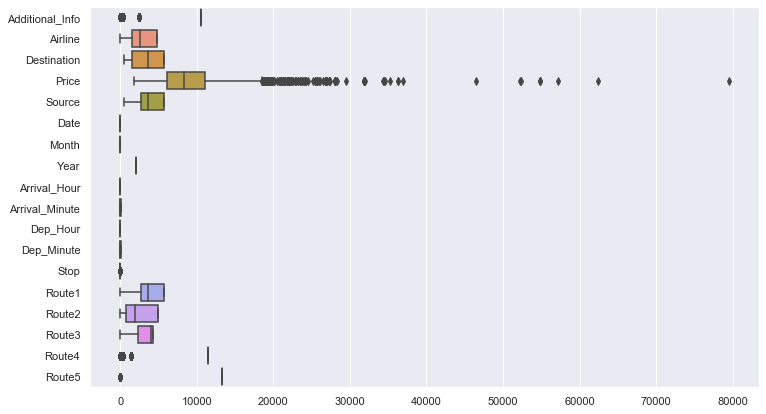

In [61]:
#checking for outliers
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
sns.boxplot(data=final_df,orient="h")

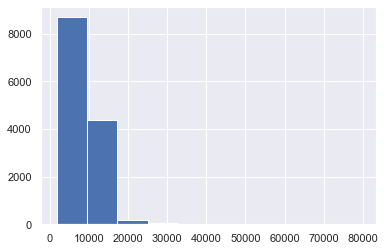

In [62]:
final_df["Price"].hist(bins=10)
#here we can see that price column highly rightly skewed

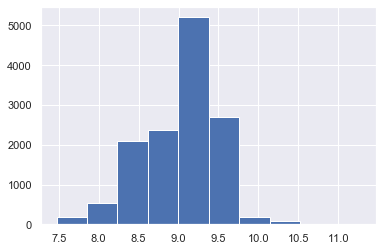

In [63]:
final_df["Price"]=np.log(final_df["Price"])
final_df["Price"].hist(bins=10)
#hence are using log transform the data became equally distributed

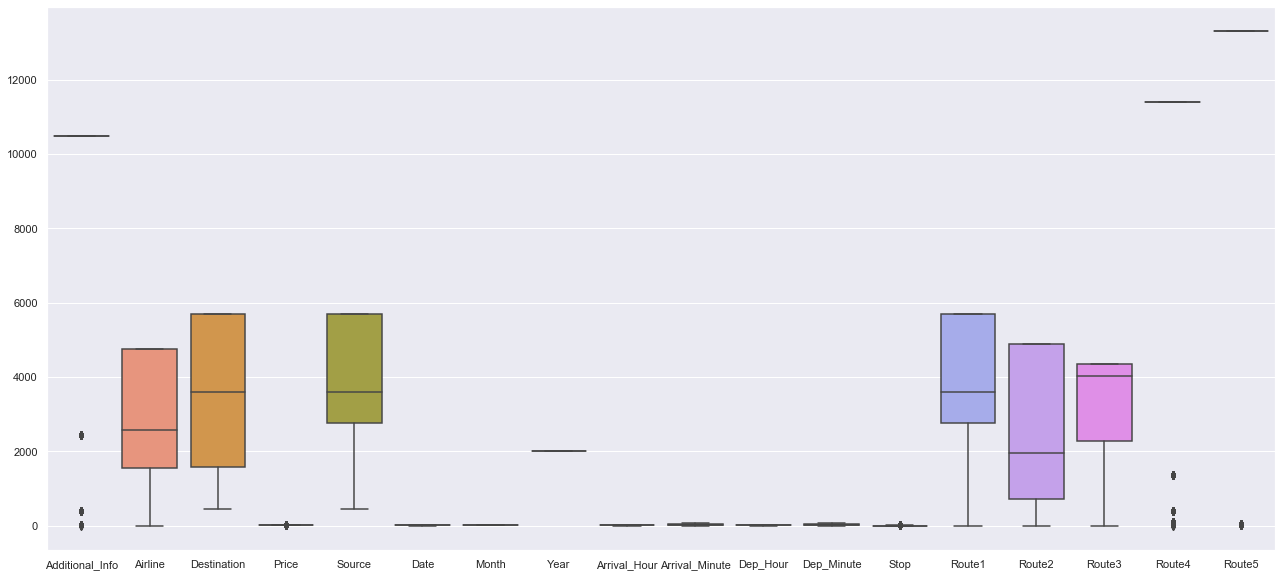

In [64]:
plt.figure(figsize=(22,10))
sns.boxplot(data=final_df)

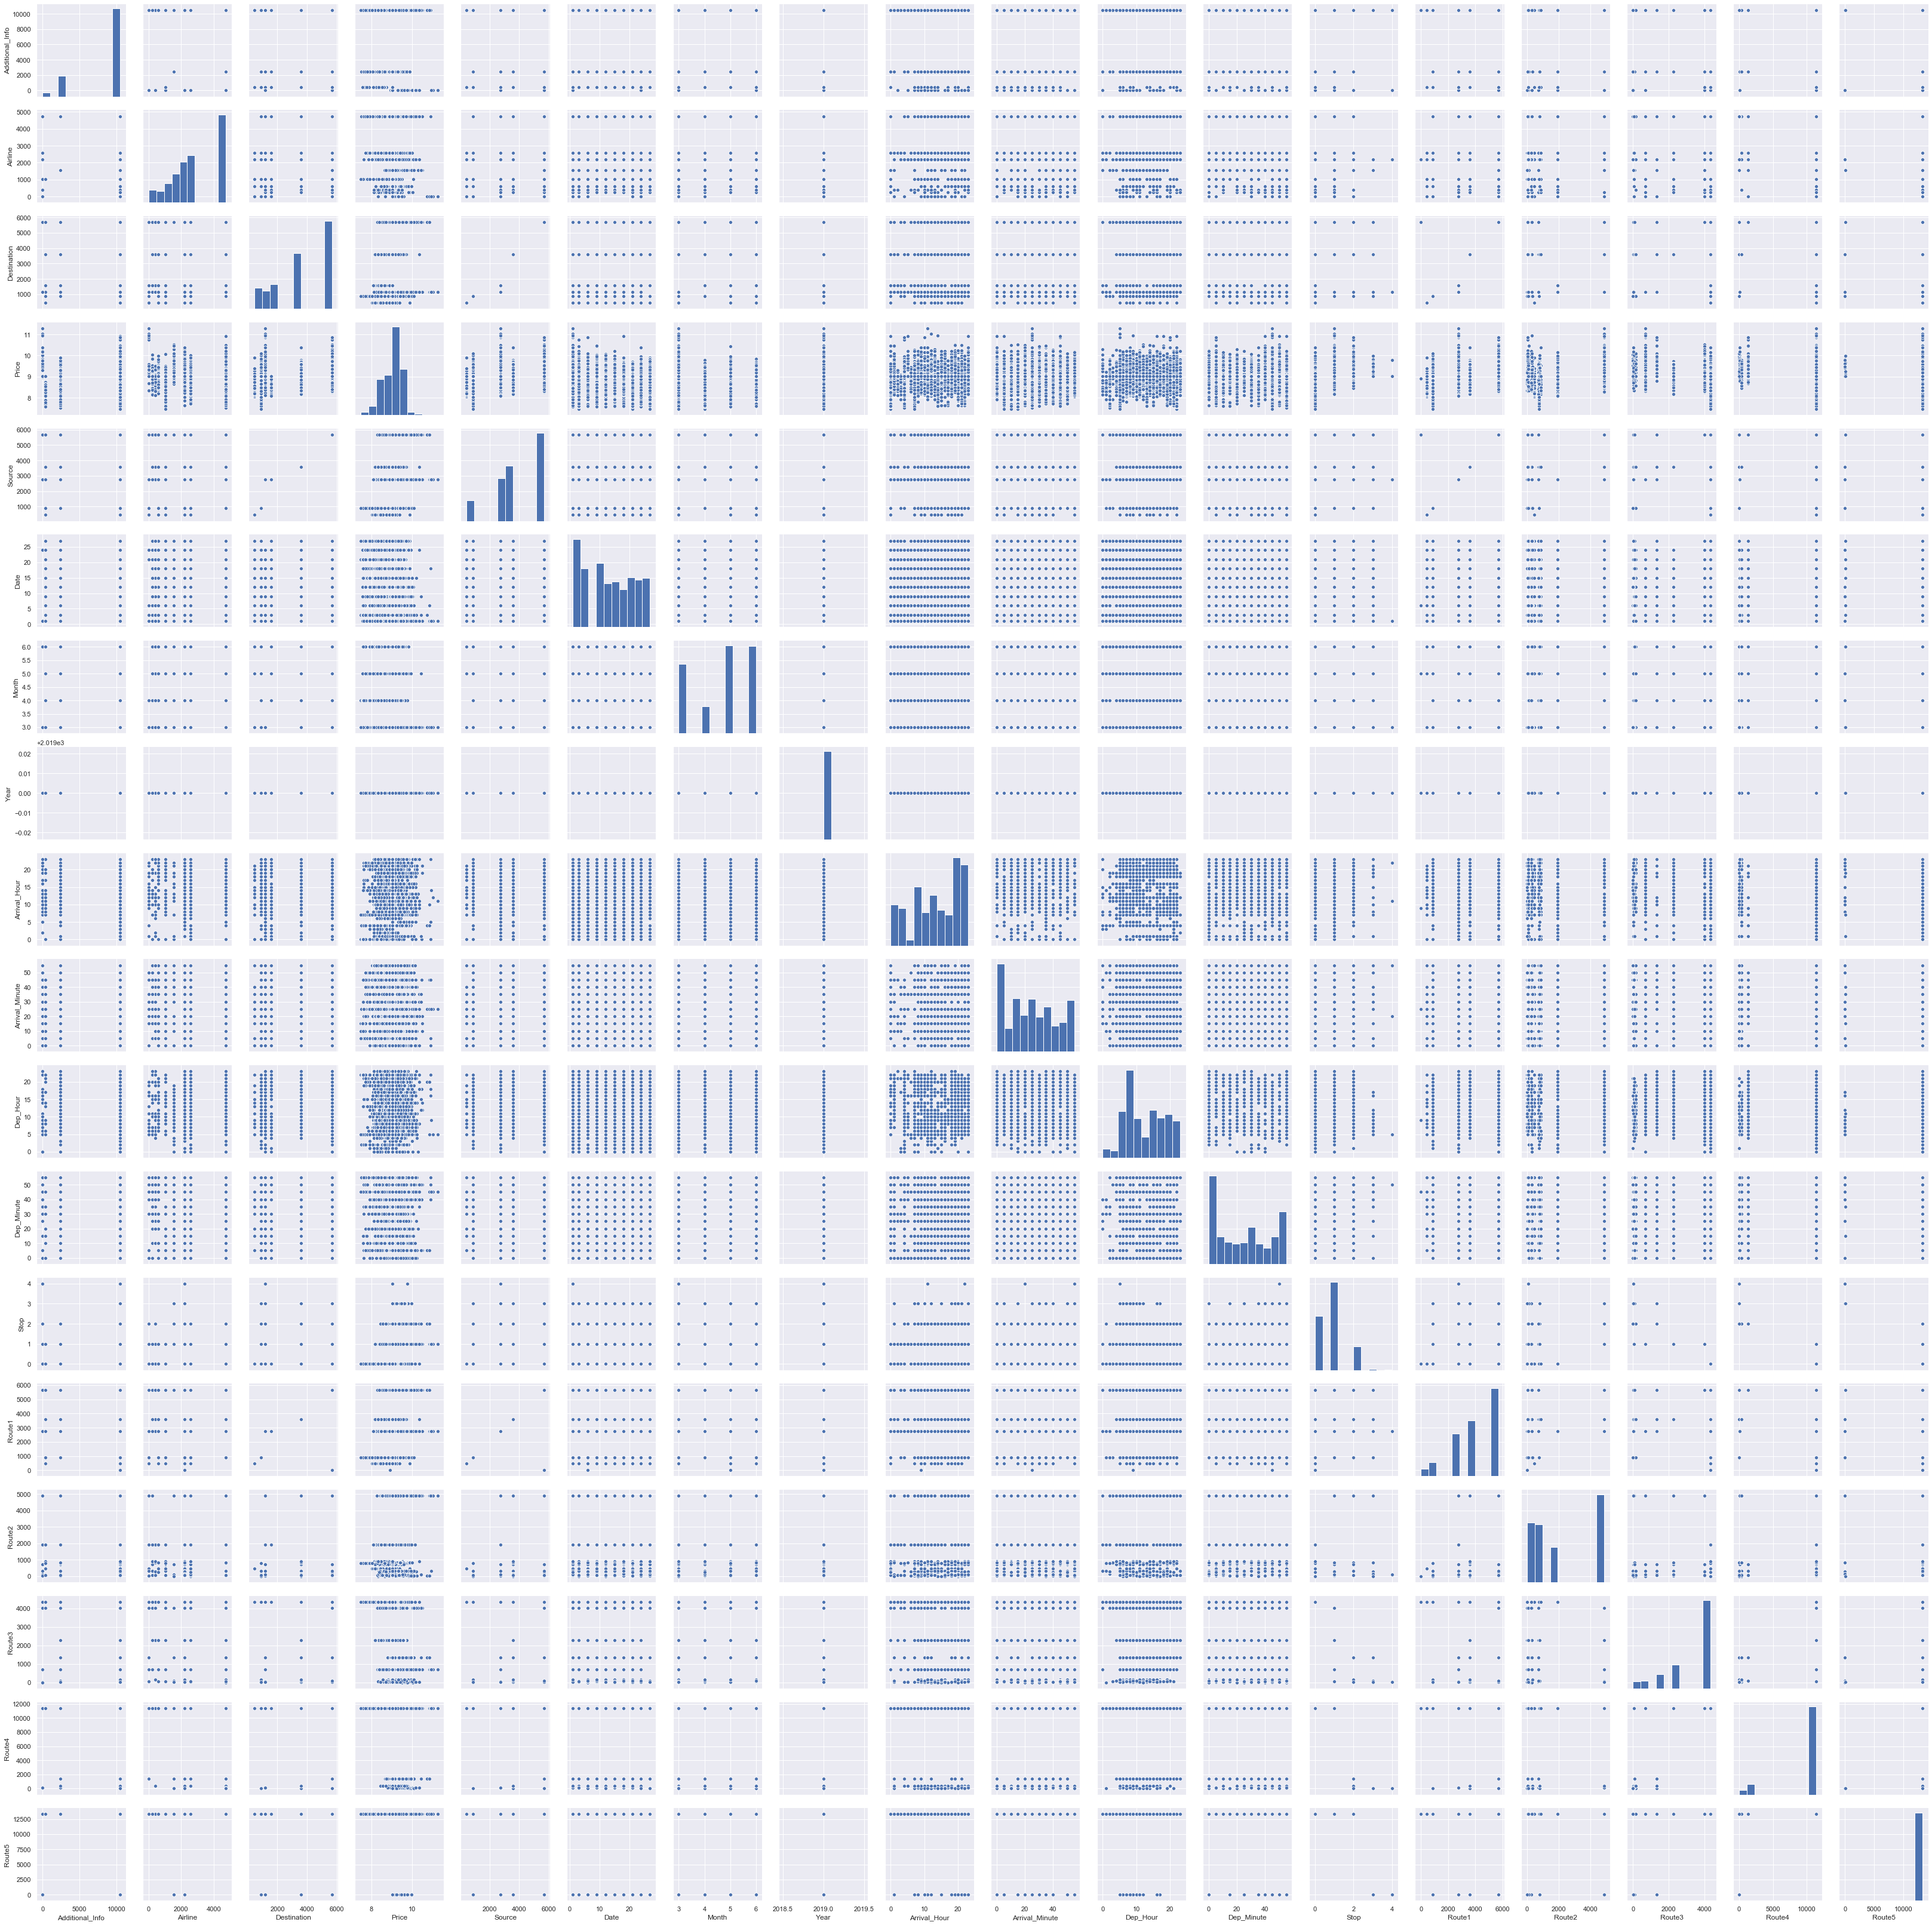

In [97]:
sns.pairplot(data=final_df)

In [107]:
x=final_df.loc[:,['Additional_Info', 'Airline', 'Destination', 'Source', 'Date',
       'Month', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Stop', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5']]

x.head()

,Additional_Info,Airline,Destination,Source,Date,Month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Stop,Route1,Route2,Route3,Route4,Route5
0,10493,2564,1170,2752,24,3,1,10,22,20,0,2752,1941,4341,11397,13296
1,10493,2192,3581,3581,1,5,13,15,5,50,2,3581,66,18,390,13296
2,10493,4746,5682,5682,9,6,4,25,9,25,2,5681,72,1345,1373,13296
3,10493,2564,3581,3581,12,5,23,30,18,5,1,3581,98,2280,11397,13296
4,10493,2564,1170,2752,1,3,21,35,16,50,1,2752,98,703,11397,13296


In [66]:
y=final_df["Price"]
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

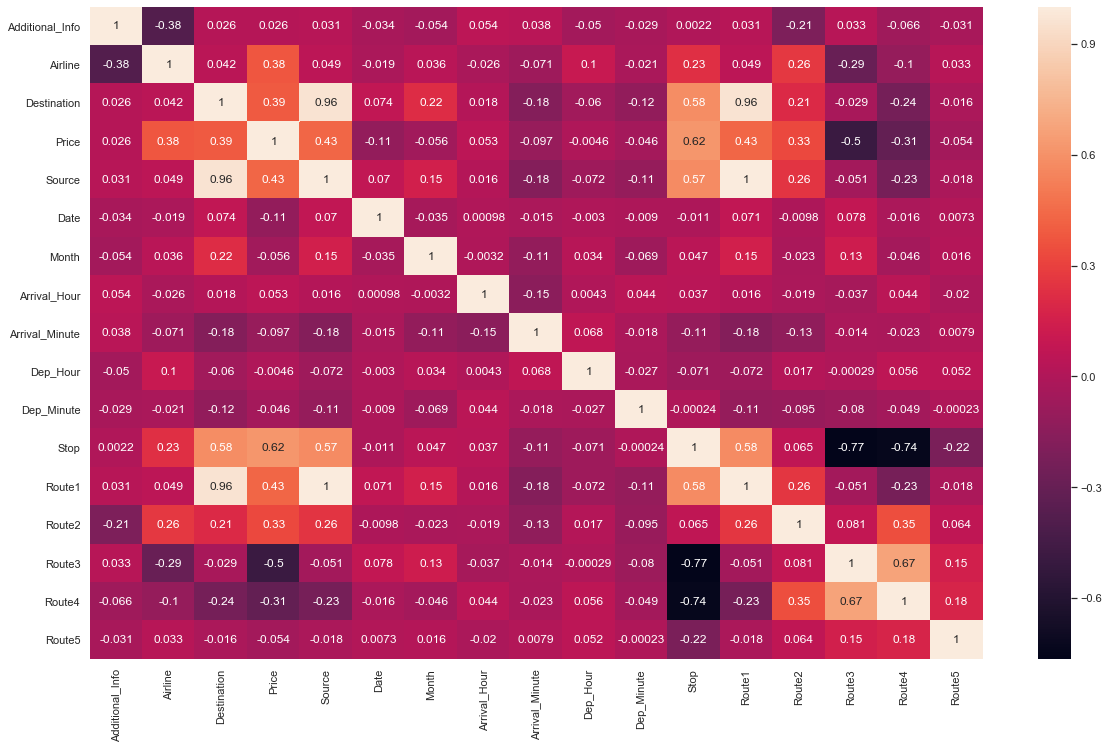

In [105]:
plt.figure(figsize=(20,12))
sns.heatmap(final_df.corr(),annot=True)

In [ ]:
#columns that we will not use in the second model are:
# additional_info
# month
# arrival_hour
# arrival_minute
# departure_hour
# departure_minute
# route5

In [101]:
final_df["Year"].value_counts()

2019    13354
Name: Year, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor

In [71]:
count=0
numbers=range(101)
model=[LinearRegression(),Lasso(),Ridge()]
for m in model:
    for number in numbers:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=number)
#         m=LinearRegression()
        m.fit(x_train,y_train)
        score=m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        print("the score for the corresponding random state",number,"is",score)

        if score>count:
            count=score
            final_number=number
    print("The model used is :", m)
    print("\n")
    print("the max score for the model",m,"with random state",final_number,"is",count)
    print("\n")
print("\n")
print("the max score for random state",final_number,"is",count)
        

the score for the corresponding random state 0 is 0.5578886527679153
the score for the corresponding random state 1 is 0.5555933753645574
the score for the corresponding random state 2 is 0.5526774526812831
the score for the corresponding random state 3 is 0.5485878194610685
the score for the corresponding random state 4 is 0.5577120544841186
the score for the corresponding random state 5 is 0.5494560966211606
the score for the corresponding random state 6 is 0.5530918823865242
the score for the corresponding random state 7 is 0.5561494920864289
the score for the corresponding random state 8 is 0.5490886011786718
the score for the corresponding random state 9 is 0.5588223617064828
the score for the corresponding random state 10 is 0.5540359213109363
the score for the corresponding random state 11 is 0.5504987486475249
the score for the corresponding random state 12 is 0.5472618615089748
the score for the corresponding random state 13 is 0.5480599115556133
the score for the correspondin

the score for the corresponding random state 14 is 0.5305503241919162
the score for the corresponding random state 15 is 0.5323749876511036
the score for the corresponding random state 16 is 0.5236153881161916
the score for the corresponding random state 17 is 0.5362358927837846
the score for the corresponding random state 18 is 0.537861524274621
the score for the corresponding random state 19 is 0.5300017617603224
the score for the corresponding random state 20 is 0.5360652391498565
the score for the corresponding random state 21 is 0.5365026207802304
the score for the corresponding random state 22 is 0.5344633757427901
the score for the corresponding random state 23 is 0.5331611809559631
the score for the corresponding random state 24 is 0.5314180440393751
the score for the corresponding random state 25 is 0.5273826337573165
the score for the corresponding random state 26 is 0.5351543096945645
the score for the corresponding random state 27 is 0.5298501570464087
the score for the cor

the score for the corresponding random state 32 is 0.5545258740218949
the score for the corresponding random state 33 is 0.5541402411887664
the score for the corresponding random state 34 is 0.5584064973036336
the score for the corresponding random state 35 is 0.5518423998221522
the score for the corresponding random state 36 is 0.5485535891879837
the score for the corresponding random state 37 is 0.5515947009291126
the score for the corresponding random state 38 is 0.5564506478891963
the score for the corresponding random state 39 is 0.5504764327318005
the score for the corresponding random state 40 is 0.5538337078175393
the score for the corresponding random state 41 is 0.5614866295591594
the score for the corresponding random state 42 is 0.5562770433587537
the score for the corresponding random state 43 is 0.5561069504765378
the score for the corresponding random state 44 is 0.5608229397617733
the score for the corresponding random state 45 is 0.5569037375833275
the score for the co

In [72]:
count=0
numbers=range(101)
model=[RandomForestRegressor(n_estimators=200),ExtraTreesRegressor(n_estimators=200),GradientBoostingRegressor(n_estimators=100)]
for m in model:
    for number in numbers:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=number)
#         
        m.fit(x_train,y_train)
        score=m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        print("the score for the corresponding random state",number,"is",score)

        if score>count:
            count=score
            final_number=number
    print("The model used is :", m)
    print("\n")
    print("the max score for the model",m,"with random state",final_number,"is",count)
    print("\n")
print("\n")
print("the max score for random state",final_number,"is",count)

the score for the corresponding random state 0 is 0.9527128926236739
the score for the corresponding random state 1 is 0.9516076848463314
the score for the corresponding random state 2 is 0.9533256072283867
the score for the corresponding random state 3 is 0.9520551169436381
the score for the corresponding random state 4 is 0.9522756472267128
the score for the corresponding random state 5 is 0.9518525705998019
the score for the corresponding random state 6 is 0.9512131659517037
the score for the corresponding random state 7 is 0.9540522979976739
the score for the corresponding random state 8 is 0.9527679030164349
the score for the corresponding random state 9 is 0.9535392697821841
the score for the corresponding random state 10 is 0.9518028785577655
the score for the corresponding random state 11 is 0.9511746360259978
the score for the corresponding random state 12 is 0.9523748818241605
the score for the corresponding random state 13 is 0.9515123813131229
the score for the correspondin

the score for the corresponding random state 2 is 0.9911464528590868
the score for the corresponding random state 3 is 0.9906644307704517
the score for the corresponding random state 4 is 0.9907388756481823
the score for the corresponding random state 5 is 0.9908697542134214
the score for the corresponding random state 6 is 0.9909735066945559
the score for the corresponding random state 7 is 0.9914605392592253
the score for the corresponding random state 8 is 0.991565214261603
the score for the corresponding random state 9 is 0.9903500654985447
the score for the corresponding random state 10 is 0.9904901065801918
the score for the corresponding random state 11 is 0.9912421330522665
the score for the corresponding random state 12 is 0.9911851954956626
the score for the corresponding random state 13 is 0.9904069854680735
the score for the corresponding random state 14 is 0.9918061506796814
the score for the corresponding random state 15 is 0.9905067863550251
the score for the correspondi

the score for the corresponding random state 5 is 0.7030983122265952
the score for the corresponding random state 6 is 0.7101713004382799
the score for the corresponding random state 7 is 0.7107881868405399
the score for the corresponding random state 8 is 0.7064760137515939
the score for the corresponding random state 9 is 0.7134675904607116
the score for the corresponding random state 10 is 0.7037860215925075
the score for the corresponding random state 11 is 0.6996818426114852
the score for the corresponding random state 12 is 0.7027546691293356
the score for the corresponding random state 13 is 0.7008091772382505
the score for the corresponding random state 14 is 0.709504791127415
the score for the corresponding random state 15 is 0.7087850008122674
the score for the corresponding random state 16 is 0.7025479696129106
the score for the corresponding random state 17 is 0.7118565229453342
the score for the corresponding random state 18 is 0.7099301246476802
the score for the correspo

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=34)
etr=ExtraTreesRegressor(n_estimators=200)        
etr.fit(x_train,y_train)
score=etr.score(x_train,y_train)
y_pred=etr.predict(x_test)

print(score)
print("\n")
print(etr.score(x_test,y_test))

0.9910509094786958


0.6499741142032107


In [76]:
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[50,100,150,200],
            "max_depth":[100,125,150,200],
           "oob_score": [True,False],
            "bootstrap":[True]
            }
gridsearch=GridSearchCV(estimator=etr,param_grid=parameters,n_jobs=-1,cv=5)
gridsearch.fit(x_train,y_train)
%time

Wall time: 0 ns


In [77]:
gridsearch.best_score_


0.6997228425158567

In [78]:
gridsearch.best_params_

{'bootstrap': True, 'max_depth': 100, 'n_estimators': 150, 'oob_score': False}

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)
lr=ExtraTreesRegressor(n_estimators=100,max_depth=100,oob_score=False,bootstrap=True)
lr.fit(x_train,y_train)
score=lr.score(x_train,y_train)
y_pred=lr.predict(x_test)
print(score)

0.9545962697554068


In [80]:
print(lr.score(x_test,y_test))

0.6906569075539503


In [83]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.2534796555164509
0.6906569075539504
0.17090820517214975


In [84]:
y_pred

array([9.56579419, 9.43254801, 8.97229904, ..., 8.82294541, 9.00331113,
       9.60040917])

Text(0, 0.5, 'y_pred')

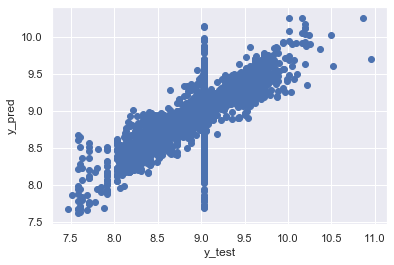

In [88]:
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [96]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lr, final_df, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.99994281 0.99980672 0.99993127 0.99994721 0.99968087 0.        ]


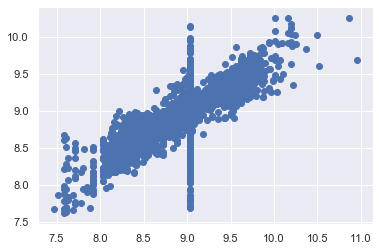

In [94]:
predictions = cross_val_predict(lr, final_df, y, cv=6)
plt.scatter(y_test, y_pred)

In [ ]:
#columns that we will not use in the second model are:
# additional_info
# month
# arrival_hour
# arrival_minute
# departure_hour
# departure_minute
# route5

In [108]:
z=final_df.loc[:,[ 'Airline', 'Destination', 'Source', 'Date',
       'Month','Stop', 'Route1', 'Route2', 'Route3', 'Route4']]

z.head()

,Airline,Destination,Source,Date,Month,Stop,Route1,Route2,Route3,Route4
0,2564,1170,2752,24,3,0,2752,1941,4341,11397
1,2192,3581,3581,1,5,2,3581,66,18,390
2,4746,5682,5682,9,6,2,5681,72,1345,1373
3,2564,3581,3581,12,5,1,3581,98,2280,11397
4,2564,1170,2752,1,3,1,2752,98,703,11397


In [109]:
y=final_df["Price"]
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [110]:
count=0
numbers=range(101)
model=[LinearRegression(),Lasso(),Ridge()]
for m in model:
    for number in numbers:
        x_train,x_test,y_train,y_test=train_test_split(z,y,test_size=.30,random_state=number)
#         m=LinearRegression()
        m.fit(x_train,y_train)
        score=m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        print("the score for the corresponding random state",number,"is",score)

        if score>count:
            count=score
            final_number=number
    print("The model used is :", m)
    print("\n")
    print("the max score for the model",m,"with random state",final_number,"is",count)
    print("\n")
print("\n")
print("the max score for random state",final_number,"is",count)

the score for the corresponding random state 0 is 0.533432316292361
the score for the corresponding random state 1 is 0.532087857149143
the score for the corresponding random state 2 is 0.5273649983771107
the score for the corresponding random state 3 is 0.5259798519551988
the score for the corresponding random state 4 is 0.5362042387412409
the score for the corresponding random state 5 is 0.526837897461315
the score for the corresponding random state 6 is 0.5315811405027588
the score for the corresponding random state 7 is 0.5315740894332601
the score for the corresponding random state 8 is 0.527936589450002
the score for the corresponding random state 9 is 0.5342585450978048
the score for the corresponding random state 10 is 0.5306899960653544
the score for the corresponding random state 11 is 0.530530721023735
the score for the corresponding random state 12 is 0.5264627831781117
the score for the corresponding random state 13 is 0.5258024939701498
the score for the corresponding ran

the score for the corresponding random state 16 is 0.5021614946541665
the score for the corresponding random state 17 is 0.5126532820585472
the score for the corresponding random state 18 is 0.5113076374448806
the score for the corresponding random state 19 is 0.5049393776013253
the score for the corresponding random state 20 is 0.514289624125607
the score for the corresponding random state 21 is 0.5105933587614666
the score for the corresponding random state 22 is 0.5110024658612584
the score for the corresponding random state 23 is 0.5059998691848671
the score for the corresponding random state 24 is 0.5080852975850363
the score for the corresponding random state 25 is 0.5031373997388834
the score for the corresponding random state 26 is 0.5106235180938623
the score for the corresponding random state 27 is 0.504985815696589
the score for the corresponding random state 28 is 0.5085131503314977
the score for the corresponding random state 29 is 0.5082856205356636
the score for the corr

the score for the corresponding random state 33 is 0.5315833422947132
the score for the corresponding random state 34 is 0.5367975840926675
the score for the corresponding random state 35 is 0.5282674540001772
the score for the corresponding random state 36 is 0.5250456735610416
the score for the corresponding random state 37 is 0.5311736262175486
the score for the corresponding random state 38 is 0.5352424712383925
the score for the corresponding random state 39 is 0.5276535017662038
the score for the corresponding random state 40 is 0.5309403645918453
the score for the corresponding random state 41 is 0.5381829354058101
the score for the corresponding random state 42 is 0.532243904483443
the score for the corresponding random state 43 is 0.5349806043316535
the score for the corresponding random state 44 is 0.5378107063004187
the score for the corresponding random state 45 is 0.5365079504560296
the score for the corresponding random state 46 is 0.5327101038627384
the score for the cor

In [111]:
count=0
numbers=range(101)
model=[RandomForestRegressor(n_estimators=200),ExtraTreesRegressor(n_estimators=200),GradientBoostingRegressor(n_estimators=100)]
for m in model:
    for number in numbers:
        x_train,x_test,y_train,y_test=train_test_split(z,y,test_size=.30,random_state=number)
#         
        m.fit(x_train,y_train)
        score=m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        print("the score for the corresponding random state",number,"is",score)

        if score>count:
            count=score
            final_number=number
    print("The model used is :", m)
    print("\n")
    print("the max score for the model",m,"with random state",final_number,"is",count)
    print("\n")
print("\n")
print("the max score for random state",final_number,"is",count)

the score for the corresponding random state 0 is 0.7711127643561925
the score for the corresponding random state 1 is 0.7644297341839836
the score for the corresponding random state 2 is 0.7616389126834175
the score for the corresponding random state 3 is 0.7659118811271811
the score for the corresponding random state 4 is 0.769372133813716
the score for the corresponding random state 5 is 0.7662711749178849
the score for the corresponding random state 6 is 0.7632853775061524
the score for the corresponding random state 7 is 0.7701848099556782
the score for the corresponding random state 8 is 0.7676120902082406
the score for the corresponding random state 9 is 0.770591699059791
the score for the corresponding random state 10 is 0.7606617061916783
the score for the corresponding random state 11 is 0.7618495153002978
the score for the corresponding random state 12 is 0.765319739724007
the score for the corresponding random state 13 is 0.7579273451034669
the score for the corresponding r

the score for the corresponding random state 2 is 0.7659008221837825
the score for the corresponding random state 3 is 0.7698801883609919
the score for the corresponding random state 4 is 0.7731929608329738
the score for the corresponding random state 5 is 0.7710546909714223
the score for the corresponding random state 6 is 0.7677554850816735
the score for the corresponding random state 7 is 0.7742967677846844
the score for the corresponding random state 8 is 0.7718133975300568
the score for the corresponding random state 9 is 0.7751332753916457
the score for the corresponding random state 10 is 0.7652218227164753
the score for the corresponding random state 11 is 0.7661459534094932
the score for the corresponding random state 12 is 0.769751129979685
the score for the corresponding random state 13 is 0.7614518047139855
the score for the corresponding random state 14 is 0.7738229225960696
the score for the corresponding random state 15 is 0.7678375085435191
the score for the correspondi

the score for the corresponding random state 5 is 0.6684361601513669
the score for the corresponding random state 6 is 0.674002091457116
the score for the corresponding random state 7 is 0.6736662149291339
the score for the corresponding random state 8 is 0.6716025850463255
the score for the corresponding random state 9 is 0.6764285640037502
the score for the corresponding random state 10 is 0.6668150796340968
the score for the corresponding random state 11 is 0.6665273572864845
the score for the corresponding random state 12 is 0.667355510619595
the score for the corresponding random state 13 is 0.661580607013339
the score for the corresponding random state 14 is 0.6735428516167032
the score for the corresponding random state 15 is 0.6719900008962189
the score for the corresponding random state 16 is 0.6688213374802094
the score for the corresponding random state 17 is 0.675150985474311
the score for the corresponding random state 18 is 0.672898497049516
the score for the correspondin